# 2022F-BSE-014

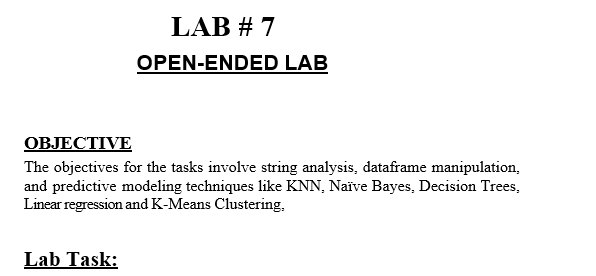

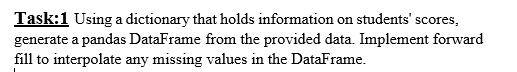

In [19]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'Names' : ['Shahrukh','Ali','rafay'],
    'marks' : [90,np.nan,85]})
print('original :\n',df)
df_fill = df.ffill();
print('after forward filling: \n',df_fill)

original :
       Names  marks
0  Shahrukh   90.0
1       Ali    NaN
2     rafay   85.0
after forward filling: 
       Names  marks
0  Shahrukh   90.0
1       Ali   90.0
2     rafay   85.0


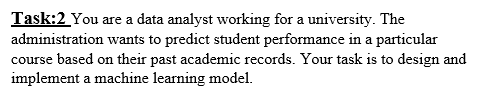

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
df = {
    "Student_ID": [1, 2, 3, 4, 5],
    "Previous_GPA": [3.5, 3.8, 2.9, 3.2, 3.6],
    "Attendance": [90, 85, 78, 88, 92],
    "Assignment_Score": [80, 85, 70, 75, 88],
    "Final_Grade": [85, 88, 78, 82, 90]  # Target variable
}

In [37]:
features = list(zip(df['Previous_GPA'],df['Attendance'],df['Assignment_Score']))
label = df['Final_Grade']
print(label)

[85, 88, 78, 82, 90]


In [38]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(features_train,label_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:

predicted = knn.predict([[3.6,90,85]])
print(predicted)

[82]


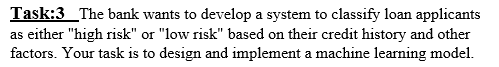

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [49]:
data = {
    'Credit_Score': [750, 680, 620, 580, 720, 690, 710, 640, 600, 770],
    'Income': [50000, 42000, 30000, 25000, 62000, 48000, 55000, 31000, 28000, 70000],
    'Loan_Amount': [10000, 15000, 20000, 25000, 12000, 18000, 14000, 22000, 27000, 11000],
    'Loan_Term': [24, 36, 48, 60, 12, 36, 24, 48, 60, 12],
    'Employment_Status': [1, 1, 0, 0, 1, 1, 1, 0, 0, 1],  # 1: Employed, 0: Unemployed
    'Existing_Loans': [1, 2, 3, 4, 1, 2, 1, 3, 4, 0],
    'Debt_to_Income_Ratio': [0.2, 0.35, 0.45, 0.5, 0.18, 0.3, 0.25, 0.4, 0.48, 0.15],
    'Risk': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0]  # 0: Low Risk, 1: High Risk
}

df = pd.DataFrame(data)
print(df)

   Credit_Score  Income  Loan_Amount  Loan_Term  Employment_Status  \
0           750   50000        10000         24                  1   
1           680   42000        15000         36                  1   
2           620   30000        20000         48                  0   
3           580   25000        25000         60                  0   
4           720   62000        12000         12                  1   
5           690   48000        18000         36                  1   
6           710   55000        14000         24                  1   
7           640   31000        22000         48                  0   
8           600   28000        27000         60                  0   
9           770   70000        11000         12                  1   

   Existing_Loans  Debt_to_Income_Ratio  Risk  
0               1                  0.20     0  
1               2                  0.35     0  
2               3                  0.45     1  
3               4                  0.

In [50]:
features = list(zip(df['Credit_Score'],df['Income'],df['Loan_Amount'],df['Loan_Term'],df['Employment_Status'],df['Existing_Loans'],
                    df['Debt_to_Income_Ratio']))

In [52]:
features_train,features_test,label_train,label_test = train_test_split(features,df['Risk'],test_size = 0.2,random_state=42)

In [54]:
model = DecisionTreeClassifier()
model.fit(features_train,label_train)

DecisionTreeClassifier()

In [56]:
predicted = model.predict(features_test)
accuracy = accuracy_score(predicted,label_test)
print(accuracy)

1.0


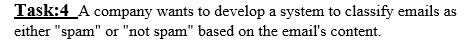

In [101]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score

In [102]:
# Create a DataFrame for spam and not spam messages
data = {
    'Message': [
        "Congratulations! You've won a $1000 gift card. Click here to claim.",
        "Win a free vacation now! Call 123-456-7890 to claim your prize.",
        "URGENT! Your bank account has been compromised. Verify now.",
        "Get rich quick with this limited-time offer. Work from home!",
        "You've been selected for a free iPhone. Reply YES to claim.",
        "Hi, are we still on for the meeting tomorrow?",
        "Can you please send me the notes from class today?",
        "Don't forget about our lunch plans this weekend!",
        "It was great catching up with you yesterday!",
        "Let's meet at 3pm for the project discussion."
    ],
    'Label': [
        'spam',   # 1
        'spam',   # 2
        'spam',   # 3
        'spam',   # 4
        'spam',   # 5
        'not spam', # 6
        'not spam', # 7
        'not spam', # 8
        'not spam', # 9
        'not spam'  # 10
    ]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


                                             Message     Label
0  Congratulations! You've won a $1000 gift card....      spam
1  Win a free vacation now! Call 123-456-7890 to ...      spam
2  URGENT! Your bank account has been compromised...      spam
3  Get rich quick with this limited-time offer. W...      spam
4  You've been selected for a free iPhone. Reply ...      spam
5      Hi, are we still on for the meeting tomorrow?  not spam
6  Can you please send me the notes from class to...  not spam
7   Don't forget about our lunch plans this weekend!  not spam
8       It was great catching up with you yesterday!  not spam
9      Let's meet at 3pm for the project discussion.  not spam


In [103]:
le = preprocessing.LabelEncoder()
Message_encoded = le.fit_transform(df['Message'])
label_encoded = le.fit_transform(df['Label'])

In [113]:
features_train,features_test,label_train,label_test = train_test_split(Message_encoded,label_encoded,test_size=.2,random_state=45)

In [114]:
model = GaussianNB()

In [115]:
model.fit(pd.DataFrame(features_train),pd.DataFrame(label_train))

C:\Users\DC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [117]:
predicted = model.predict(pd.DataFrame(features_test))
accuracy = accuracy_score(label_test, predicted)
print(accuracy)

1.0


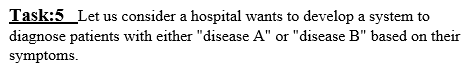

In [169]:
import pandas as pd 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [170]:
# Sample data for symptoms and diagnoses
data = {
    'Symptom_1': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0],  # 1 indicates presence of a symptom
    'Symptom_2': [0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    'Symptom_3': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0],
    'Diagnosis': ['disease A', 'disease B', 'disease A', 'disease A', 'disease B',
                  'disease A', 'disease B', 'disease A', 'disease B', 'disease B']
}
# Create DataFrame
df = pd.DataFrame(data)
print(df)

   Symptom_1  Symptom_2  Symptom_3  Diagnosis
0          1          0          1  disease A
1          0          1          1  disease B
2          1          1          0  disease A
3          1          0          1  disease A
4          0          1          0  disease B
5          1          0          1  disease A
6          0          1          1  disease B
7          1          1          0  disease A
8          0          0          1  disease B
9          0          1          0  disease B


In [171]:
le = preprocessing.LabelEncoder()
Diagnosis_encoded = le.fit_transform(df['Diagnosis'])

In [172]:
features = list(zip(df['Symptom_1'], df['Symptom_2'], df['Symptom_3']))

In [173]:
features_train,features_test,label_train,label_test = train_test_split(features,Diagnosis_encoded,test_size=.2,random_state=42)

In [174]:
model = GaussianNB()
model.fit(features_train,label_train)

GaussianNB()

In [175]:
predicted = model.predict(features_test)
accuracy = accuracy_score(predicted,label_test)
print(accuracy)

1.0


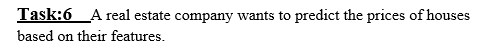

In [186]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [196]:
area =[2600,3000,3200,3600,4000]
price = [550000,565000,610000,680000,725000]

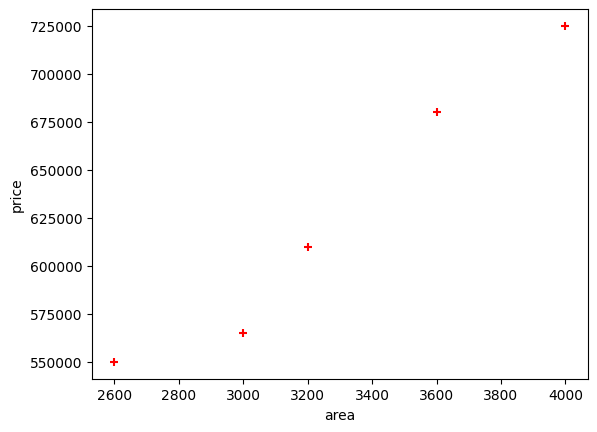

In [199]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
print(plt.scatter(area,price,color='red',marker='+'))

In [200]:
feature = area
label = price

In [202]:
model = LinearRegression()
model.fit(pd.DataFrame(feature),label)

LinearRegression()

In [207]:
predicted = model.predict([[3300]])
print(predicted)

[628715.75342466]


# from github